In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy
from matplotlib import gridspec
import matplotlib.lines as mlines
import utils
import xarray
import warnings
import pandas
import string
import datetime
import importlib
importlib.reload(utils)
import gsw
warnings.filterwarnings('ignore')
import importlib # to be able to reload user modules with importlib.reload(utils)
importlib.reload(utils)

#df, profiles = utils.create_dataframe(pfloat='5904471_Mprof.nc', force_reconstruction=False)
#df_col = xarray.open_dataset('../data/collocation_5904471_Mprof.nc'); #title='300234067208900'

df, profiles = utils.create_dataframe(pfloat='300234067208900.nc', force_reconstruction=False)
df_col = xarray.open_dataset('../data/collocation_300234067208900.nc'); title='300234067208900'

dfnew, profilesnew = utils.create_dataframe(pfloat='300234068638900.nc', force_reconstruction=False)
df_colnew = xarray.open_dataset('../data/collocation_300234068638900.nc'); title='300234068638900.nc'

Returning previously computed DataFrame...
Returning previously computed DataFrame...


163 profiles were plotted


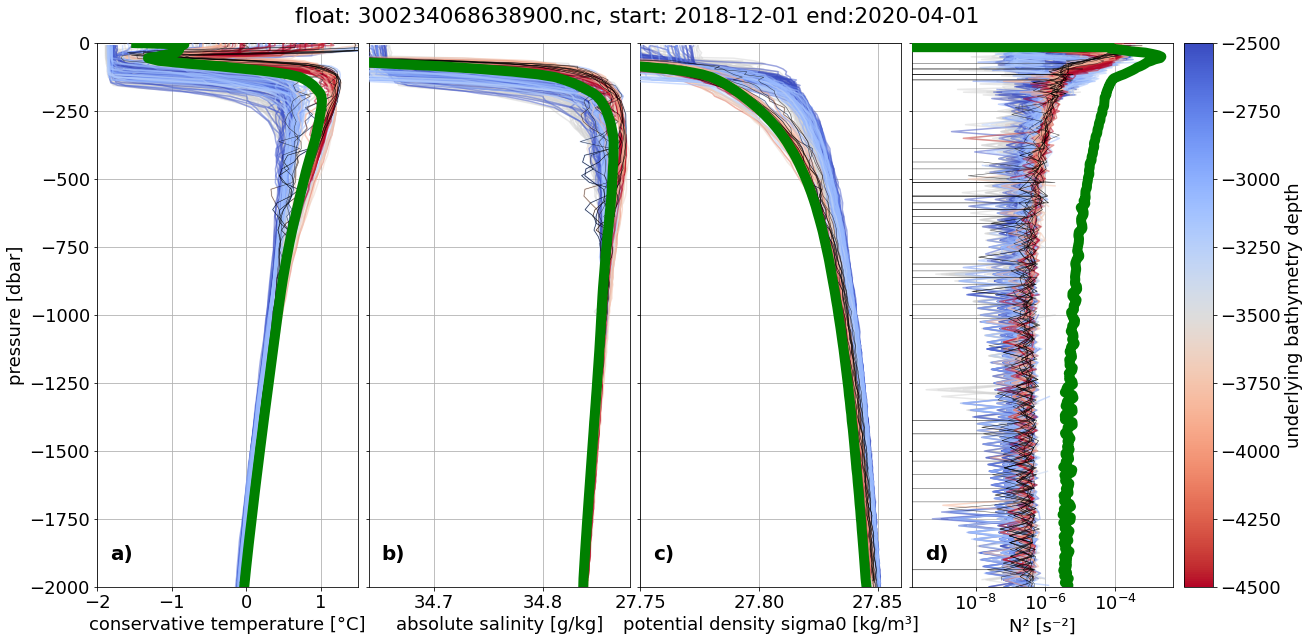

In [2]:
plt.rc('font', size=18)

# As above but with bottom slope. Needs execution of bathymetry_depth code above first
variables = ['tem', 'sal', 'den','nsq']
#years = numpy.arange(2018,2020,1) # limit this until 2020!!!!!!!!!!!!!!!!
#months = numpy.arange(1,13,1)
variables_dictionary = dict(tem='conservative temperature [°C]',
                           sal='absolute salinity [g/kg]',
                           den='potential density sigma0 [kg/m³]',
                           gamman='neutral density [kg/m³]',
                           spice='spice [kg/m³]',
                           nsq='N² [s⁻²]')
#for i in range(2,13):
fig, axs = plt.subplots(nrows=1, ncols=5, 
                        gridspec_kw={'width_ratios':[9,9,9,9,1], 'wspace':0.05}, figsize=[20,10])#, sharey=True)

datestart = datetime.date(2018,12,1)
dateend = datetime.date(2020,4,1)

#months = numpy.arange(i-1,i,1)
for index, variable in enumerate(variables):
    xi, yi, grid_z0 = utils.create_datagrid(df=dfnew, variable=variable)
    axs[index].plot(numpy.nanmean(grid_z0, axis=1,), yi, color='green', zorder=200, lw=10)

    # norm = matplotlib.colors.Normalize(vmin=-50.0, vmax=50.0)
    norm = matplotlib.colors.Normalize(vmin=-4500.0, vmax=-2500.0)
    cmap = plt.cm.coolwarm_r
    
    
    for rmsindex in [130,131,149,150]: # for WDW in MRDW
        #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #                alpha=0.7, zorder=5, ls='-', color=rgba)#color='tab:blue', )
        axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
                        alpha=0.7, zorder=5, ls='-', color='k', lw=0.5)
        depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo

    for rmsindex in [133, 147, 148, 152, 153]: # for MRDW in WDW
        #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #                alpha=1, zorder=5, ls='-', color=rgba) #color='tab:red'
        axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
                        alpha=1, zorder=5, ls='-', color='k', lw=0.5)
        depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo
    
    profilescounter = 0
    for cycle in range(max(df['cyk']),2,-1):#max(df['cyk']),2,-1):
        profile = df[df['cyk']==cycle]
        profile = profile.drop_duplicates(subset = ["sal"])
        N2, pmid = gsw.Nsquared(profile['sal'], profile['tem'], -profile['pre'])
        N2[N2<=0] = numpy.nan
        if len(profile)==0:
            continue

        if (profile.iloc[0].dates.date()-datestart > datetime.timedelta(days=0)) and (
            profile.iloc[0].dates.date()-dateend < datetime.timedelta(days=0)):
        #if (profile.iloc[0].dates.year in years) and (
        #    profile.iloc[0].dates.month in months):
            try:
                depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo#_grady
            except:
                continue
            profilescounter += 1
            rgba = cmap(norm(depth))
            if variable == 'nsq':
                axs[index].plot(N2, -pmid, color=rgba, alpha=0.5, zorder=3)
            else:
                axs[index].plot(profile[variable], profile['pre'], color=rgba, alpha=0.5, zorder=3)
        else:
            if variable == 'nsq':
                axs[index].plot(N2, -pmid, color='lightgrey', alpha=0.5, zorder=-2)
            else:
                axs[index].plot(profile[variable], profile['pre'], color='lightgrey', alpha=0.5, zorder=-2)

    axs[index].set_xlabel(variables_dictionary[variable])
    axs[index].grid(zorder=0)
    axs[index].set_ylim(-2000,0)

fig.suptitle('float: %s, start: %s end:%s'%(title, datestart, dateend), y=0.93)
axs[0].set_ylabel('pressure [dbar]')
axs[0].set_xlim(-2,1.5)
axs[1].set_xlim(34.64,34.88)
axs[2].set_xlim(27.75,27.86)
#axs[3].set_xlim(-0.00005,0.0003)
#axs[2].set_xlim(28,28.3)
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
axs[3].set_yticklabels([])
axs[3].set_xscale('log')
cb1 = matplotlib.colorbar.ColorbarBase(axs[len(variables)], cmap=cmap,
                                norm=norm,)
                                #orientation='horizontal')

cb1.set_label('underlying bathymetry depth')
print('%s profiles were plotted'%profilescounter)
for n, ax in enumerate(axs[0:4]):   
    ax.text(0.05, 0.05, string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=20, weight='bold')
plt.tight_layout()
#plt.savefig('../plots/figures/figure3_new2.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
filenames = {'300234067208900.nc':'blue',
             #'300234068638900.nc':'red',
             #'5904468_Mprof.nc':'orange', 
             #'5904471_Mprof.nc':'purple', 
             #'GL_PR_PF_5903616.nc':'brown',
             #'GL_PR_PF_7900640.nc':'green', 
             #'GL_PR_PF_5905382.nc':'olive',
             }

variables_dictionary = dict(tem='conservative temperature',
                           sal='absolute salinity',
                           den=r'potential density ($\sigma_0$)',
                           gamman='neutral density',
                           spice='spice')
units_dictionary = dict(tem='[°C]',
                        sal='[g/kg]',
                        den='[kg/m³]',
                        gamman='[kg/m³]',
                        spice='[kg/m³]')
normdict = dict(
    depth_topo=matplotlib.colors.Normalize(vmin=-4500.0, vmax=-2500.0),
    slope=matplotlib.colors.Normalize(vmin=0, vmax=50),
    longitude=matplotlib.colors.Normalize(vmin=0, vmax=200),#6),
    latitude=matplotlib.colors.Normalize(vmin=-67, vmax=-63.5))
cmapdict = dict(
    depth_topo=plt.cm.coolwarm_r,
    slope=plt.cm.Greys,
    longitude=plt.cm.cividis,
    latitude=plt.cm.cividis)

163 profiles were plotted
Returning previously computed DataFrame...
for the variable tem, 242 values were plotted
for the variable sal, 242 values were plotted
for the variable den, 242 values were plotted
for the variable nsq, 242 values were plotted
Returning previously computed DataFrame...
for the variable tem, 67 values were plotted
for the variable sal, 67 values were plotted
for the variable den, 67 values were plotted
for the variable nsq, 67 values were plotted
Returning previously computed DataFrame...
for the variable tem, 0 values were plotted
for the variable sal, 0 values were plotted
for the variable den, 0 values were plotted
for the variable nsq, 0 values were plotted
Returning previously computed DataFrame...
for the variable tem, 93 values were plotted
for the variable sal, 93 values were plotted
for the variable den, 93 values were plotted
for the variable nsq, 93 values were plotted
Returning previously computed DataFrame...
for the variable tem, 0 values were plo

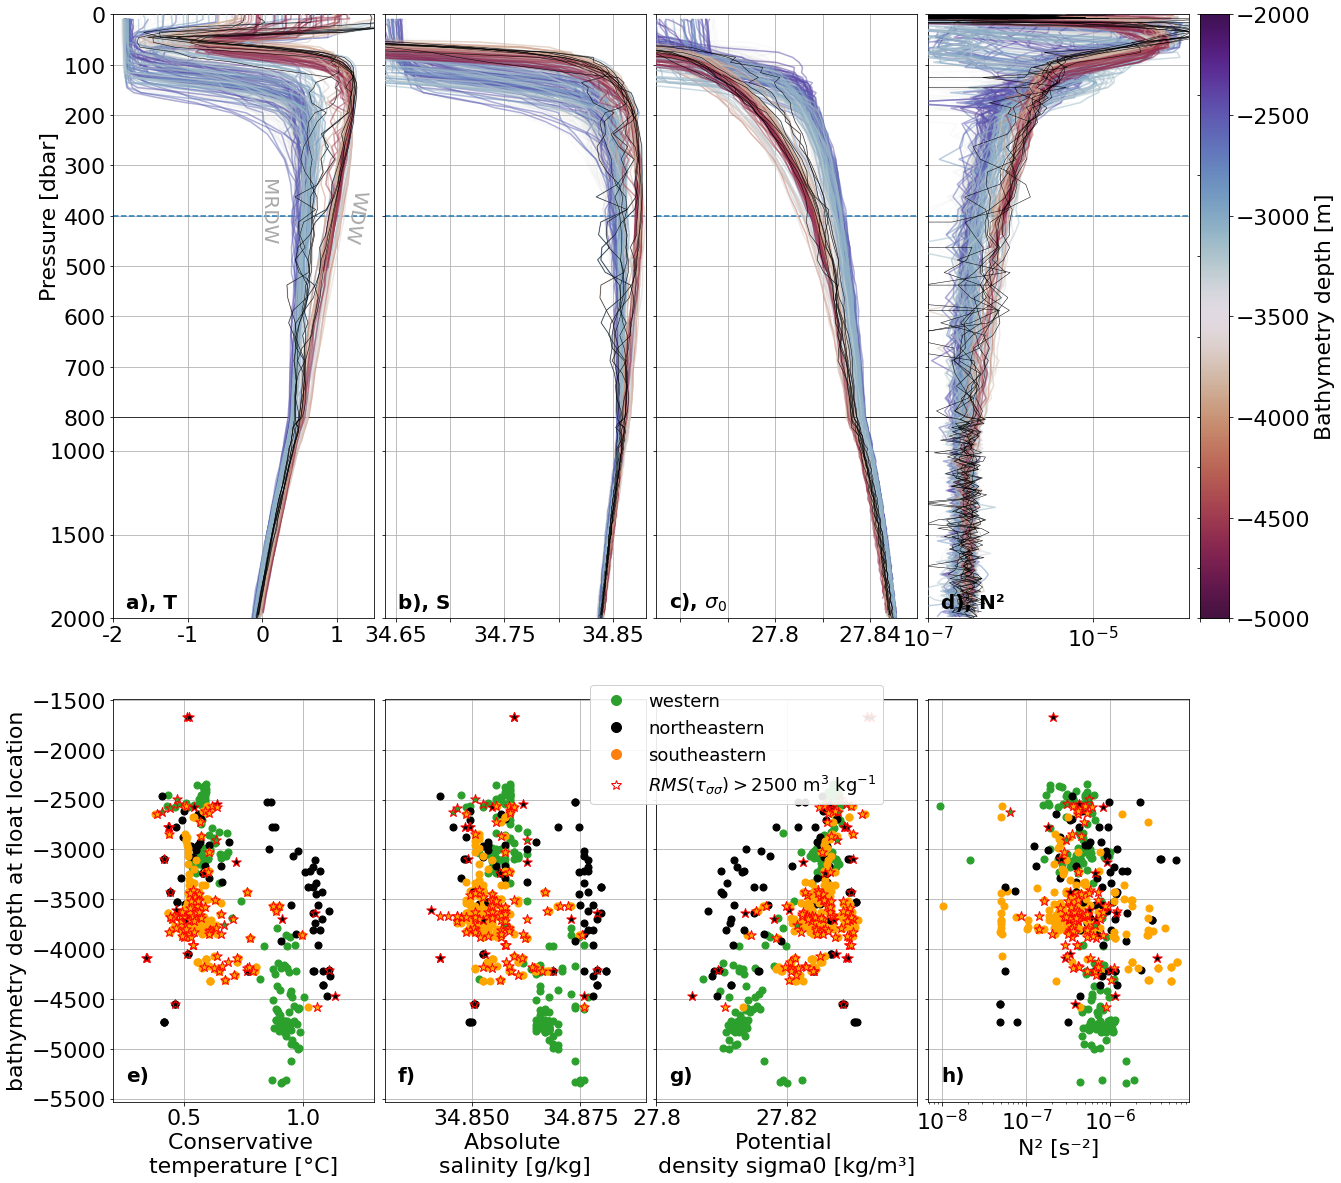

In [11]:
plt.rc('font', size=22)
importlib.reload(utils)
import matplotlib.colors as colors2

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors2.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(numpy.linspace(minval, maxval, n)))
    return new_cmap

# As above but with bottom slope. Needs execution of bathymetry_depth code above first
variables = ['tem', 'sal', 'den', 'nsq']
#years = numpy.arange(2018,2020,1) # limit this until 2020!!!!!!!!!!!!!!!!
#months = numpy.arange(1,13,1)
variables_dictionary = dict(tem='Conservative \ntemperature [°C]',
                           sal='Absolute \nsalinity [g/kg]',
                           den='Potential \ndensity sigma0 [kg/m³]',
                           gamman='Neutral \ndensity [kg/m³]',
                           spice='Spice \n[kg/m³]',
                           nsq='N² [s⁻²]')
#for i in range(2,13):
#gs_top = plt.GridSpec(3, 5, top=0.95)
#gs_base = plt.GridSpec(3, 5, hspace=0)
#fig = plt.figure()

# Top (unshared) axes
#axs = gs_top#fig.add_subplot(gs_top[0:2,:])

fig, axs = plt.subplots(nrows=4, ncols=5,
                        gridspec_kw={'width_ratios':[9,9,9,9,1], 'wspace':0.05, 'hspace':0.0,
                                     'height_ratios':[2,1,0.4,2]}, figsize=[20,20])#, sharex='col')


datestart = datetime.date(2018,12,1)
dateend = datetime.date(2020,4,1)

depthranges = [dict(min=-800, max=0),
               dict(min=-2000, max=-800)]
#months = numpy.arange(i-1,i,1)
for row in [0,1]:
    for index, variable in enumerate(variables):

        # norm = matplotlib.colors.Normalize(vmin=-50.0, vmax=50.0)
        # norm = matplotlib.colors.Normalize(vmin=-4500.0, vmax=-2500.0)
        # cmap = plt.cm.coolwarm_r
        norm = matplotlib.colors.Normalize(vmin=-5000., vmax=-2000.)
        #cmap = plt.cm.twilight_shifted_r
        cmap = truncate_colormap(cmap = plt.get_cmap('twilight_shifted_r'), minval=0.05, maxval=0.95)

        for rmsindex in [130,131,149,150, 133, 147, 148, 152, 153]: # for WDW in MRDW
            #if variable == 'nsq':
            #    print('nuuu!')
            #    breakpoint()
            #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
            #                alpha=0.7, zorder=5, ls='-', color=rgba)#color='tab:blue', )
            profile = profiles[rmsindex].drop_duplicates(subset = ["sal"])
            N2, pmid = gsw.Nsquared(profile.rolling(2).mean()['sal'], 
                                    profile.rolling(2).mean()['tem'], 
                                   -profile.rolling(2).mean()['pre'])
            if variable == 'nsq':
                #axs[row][index].plot(N2, -pmid, color=rgba, alpha=0.5, zorder=3)
                axs[row][index].plot(N2, -pmid, 
                                alpha=1, zorder=5, ls='-', color='k', lw=0.5)
            else:
                axs[row][index].plot(profile[variable], profile['pre'], 
                                alpha=1, zorder=5, ls='-', color='k', lw=0.5)
                
            depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo

        #for rmsindex in [133, 147, 148, 152, 153]: # for MRDW in WDW
        #    #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #    #                alpha=1, zorder=5, ls='-', color=rgba) #color='tab:red'
        #    axs[row][index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #                    alpha=1, zorder=5, ls='-', color='k', lw=0.5)
        #    depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo

        profilescounter = 0
        for cycle in range(max(df['cyk']),2,-1):
            profile = df[df['cyk']==cycle]
            profile = profile.drop_duplicates(subset = ["sal"])
            if len(profile)==0:
                continue
                
            upperdepthlimit = 10
            lowerdepthlimit= 1000
            #smprofile = utils.smooth_profile(profile, smooth_params=dict(sal=0.00005, tem=0.00015, den=0.00005),
            #                           upperdepthlimit=upperdepthlimit, 
            #                           lowerdepthlimit=lowerdepthlimit, skipnan=True)
            #if smprofile:
            N2, pmid = gsw.Nsquared(profile.rolling(4).mean()['sal'], 
                                    profile.rolling(4).mean()['tem'], 
                                   -profile.rolling(4).mean()['pre'])
            N2[N2<=0] = numpy.nan
            #else:
            #    pass
                #print('skipped one')

            # unsaubere Loesung
            #profile['nsq'] = numpy.append(N2, N2[-1])

            if (profile.iloc[0].dates.date()-datestart > datetime.timedelta(days=0)) and (
                profile.iloc[0].dates.date()-dateend < datetime.timedelta(days=0)):
            #if (profile.iloc[0].dates.year in years) and (
            #    profile.iloc[0].dates.month in months):
                try:
                    depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo#_grady
                except:
                    continue
                profilescounter += 1
                rgba = cmap(norm(depth))
                if variable == 'nsq':
                    axs[row][index].plot(N2, -pmid, color=rgba, alpha=0.5, zorder=3)
                else:
                    axs[row][index].plot(profile[variable], profile['pre'], color=rgba, alpha=0.5, zorder=3)
            else:
                if variable == 'nsq':
                    axs[row][index].plot(N2, -pmid, color='lightgrey', alpha=0.1, zorder=-2)
                else:
                    axs[row][index].plot(profile[variable], profile['pre'], color='lightgrey', alpha=0.1, zorder=-2)
        axs[3][index].set_xlabel(variables_dictionary[variable])
        axs[row][index].grid(zorder=0)
        axs[row][index].set_ylim(depthranges[row]['min'],depthranges[row]['max'])
        # axs[row][0].text(x=0, y=-300, s='Mein Text')
    axs[row][0].set_xlim(-2,1.5)
    axs[row][0].set_xticks([-2,-1,0,1])
    axs[row][0].set_xticklabels([-2,-1,0,1])
    
    axs[row][1].set_xlim(34.64,34.88)
    axs[row][1].set_xticks(numpy.arange(34.65,34.88,0.05))
    axs[row][1].set_xticklabels(['34.65', '', '34.75', '', '34.85'])
    axs[row][2].set_xlim(27.75,27.86)
    axs[row][2].set_xticks(numpy.arange(27.76,27.86,0.02))
    axs[row][2].set_xticklabels(['','','27.8', '','27.84'])
    #axs[row][2].set_xlim(0,0.005)
    #axs[row][3].set_xlim(-0.00005,0.0003)
    axs[row][3].set_xscale('log')

    #axs[row][2].set_xlim(28,28.3)
    axs[row][1].set_yticklabels([])
    axs[row][2].set_yticklabels([])
    #axs[row][3].set_yticklabels([])
    axs[row][4].set_yticklabels([])

        
# fig.suptitle('float: %s, start: %s end:%s'%(title, datestart, dateend), y=0.93)
axs[0][0].set_ylabel('Pressure [dbar]')

# ax3 = fig.add_subplot(gs[:, 3])
gs = axs[1, 2].get_gridspec()
axbig = fig.add_subplot(gs[:2, -1])

cb1 = matplotlib.colorbar.ColorbarBase(axbig, cmap=cmap,
                                norm=norm,)
                                #orientation='horizontal')

#removing the 'labels' from the colorbar
axs[0,3].set_yticklabels([])
axs[1,3].set_yticklabels([])
#axs[1,3].set_xticklabels([])
axs[1,4].set_xticklabels([])

cb1.set_label('Bathymetry depth [m]')
print('%s profiles were plotted'%profilescounter)
sebs_naming = ['T', 'S', r'$\sigma_{0}$', 'N²', '', '', '', '']
for row in [1]:
    for n, ax in enumerate(axs[row][0:4]):
        axs[0][n].axhline(y=-400, linestyle='--')
        ax.text(0.05, 0.05, string.ascii_lowercase[n]+'), '+sebs_naming[n], transform=ax.transAxes, 
                size=20, weight='bold')


axs[0][0].text(x=-0.05, y=-450, s='MRDW', size=20, color='darkgrey', rotation=-90)
axs[0][0].text(x=1.05, y=-450, s='WDW', size=20, color='darkgrey', rotation=-100)

for i in [0,1,2,3,4]:
    axs[2][i].remove()
    axs[0][i].set_xticklabels([])
        
plt.tight_layout()
#plt.savefig('../plots/figures/figure3_new3.png', dpi=300, bbox_inches='tight')
#plt.show()


# end of profileplots
# start of scatterplots
comparedepth = 400
    
#plt.rc('font', size=20)
#fig, axs = plt.subplots(nrows=1, ncols=3, gridspec_kw={'width_ratios':[5,5,5], 'hspace':0.1}, figsize=[20,10])#, sharey=True)
years = numpy.arange(2018,2022,1)
months = numpy.arange(1,13,1)

filenames = {'300234067208900.nc':'blue',
             '300234068638900.nc':'red',
             '5904468_Mprof.nc':'orange', 
             '5904471_Mprof.nc':'purple', 
             'GL_PR_PF_5903616.nc':'brown',
             'GL_PR_PF_7900640.nc':'green', 
             'GL_PR_PF_5905382.nc':'olive',
             }


variables = ['tem', 'sal', 'den', 'nsq']
colorby='region'
edgecolorby='rms'


utils.plot_colored_figure(years=years, months=months, filenames=filenames, 
                variables=variables, mode='scatter', colorby=colorby, 
                edgecolorby=edgecolorby, comparedepth=comparedepth,
                axs=axs[3][:])

axs[3][1].set_yticklabels([])
axs[3][2].set_yticklabels([])
axs[3][3].set_yticklabels([])
axs[3][4].set_yticklabels([])
axs[3][4].remove()

axs[3][0].set_xlim(0.2,1.3)
axs[3][1].set_xlim(34.83,34.89)
axs[3][2].set_xlim(27.8,27.84)
axs[3][2].set_xticks([27.8,27.82,27.84])
axs[3][2].set_xticklabels(['27.8', '27.82', ''])
axs[3][3].set_xscale('log')
axs[0][3].set_xlim(1e-7,1.5e-4)
axs[1][3].set_xlim(1e-7,1.5e-4)
#axs[3].set_xlim(1e-7,1.5e-4)
axs[0][0].set_yticks([0,-100,-200,-300,-400,-500,-600,-700,-800])
axs[0][0].set_yticklabels(['0','100','200','300','400','500','600','700','800'])
axs[1][0].set_yticks([-1000, -1500, -2000])
axs[1][0].set_yticklabels(['1000', '1500', '2000'])


for n, ax in enumerate(axs[3][0:4]): 
    ax.text(0.05, 0.05, string.ascii_lowercase[n+4]+')', transform=ax.transAxes, 
            size=20, weight='bold')
    ax.grid()
    
blue_dot = mlines.Line2D([], [], color='tab:green', marker='o', linestyle='None',
                          markersize=10, label='western')
black_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=10, label='northeastern')
orange_dot = mlines.Line2D([], [], color='tab:orange', marker='o', linestyle='None',
                          markersize=10, label='southeastern')
red_star = mlines.Line2D([], [], color='white', markeredgecolor='red', marker='*', linestyle='None',
                          markersize=10, label=r'$RMS(\tau_{\sigma \sigma})>2500~\mathrm{m}^3~\mathrm{kg}^{-1}$')
#axs[3][1].legend(handles=[blue_dot, black_dot, orange_dot, red_star], fontsize=18,
#                framealpha=0.5, bbox_to_anchor=(0.85, 1.05)).set_zorder(102)
fig.legend(handles=[blue_dot, black_dot, orange_dot, red_star], fontsize=18,
                framealpha=0.9, loc=(0.44,0.32))
#fig.legend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )
#plt.legend()

print('Maybe asking Chscherbina for advice about the high sp curvature values also')
plt.savefig('../plots/figures/figure3.png', dpi=200)
plt.show()

163 profiles were plotted
Returning previously computed DataFrame...
for the variable tem, 243 values were plotted
for the variable sal, 243 values were plotted
for the variable den, 243 values were plotted
for the variable nsq, 243 values were plotted
Returning previously computed DataFrame...
for the variable tem, 68 values were plotted
for the variable sal, 68 values were plotted
for the variable den, 68 values were plotted
for the variable nsq, 68 values were plotted
Returning previously computed DataFrame...
for the variable tem, 0 values were plotted
for the variable sal, 0 values were plotted
for the variable den, 0 values were plotted
for the variable nsq, 0 values were plotted
Returning previously computed DataFrame...
for the variable tem, 93 values were plotted
for the variable sal, 93 values were plotted
for the variable den, 93 values were plotted
for the variable nsq, 93 values were plotted
Returning previously computed DataFrame...
for the variable tem, 0 values were plo

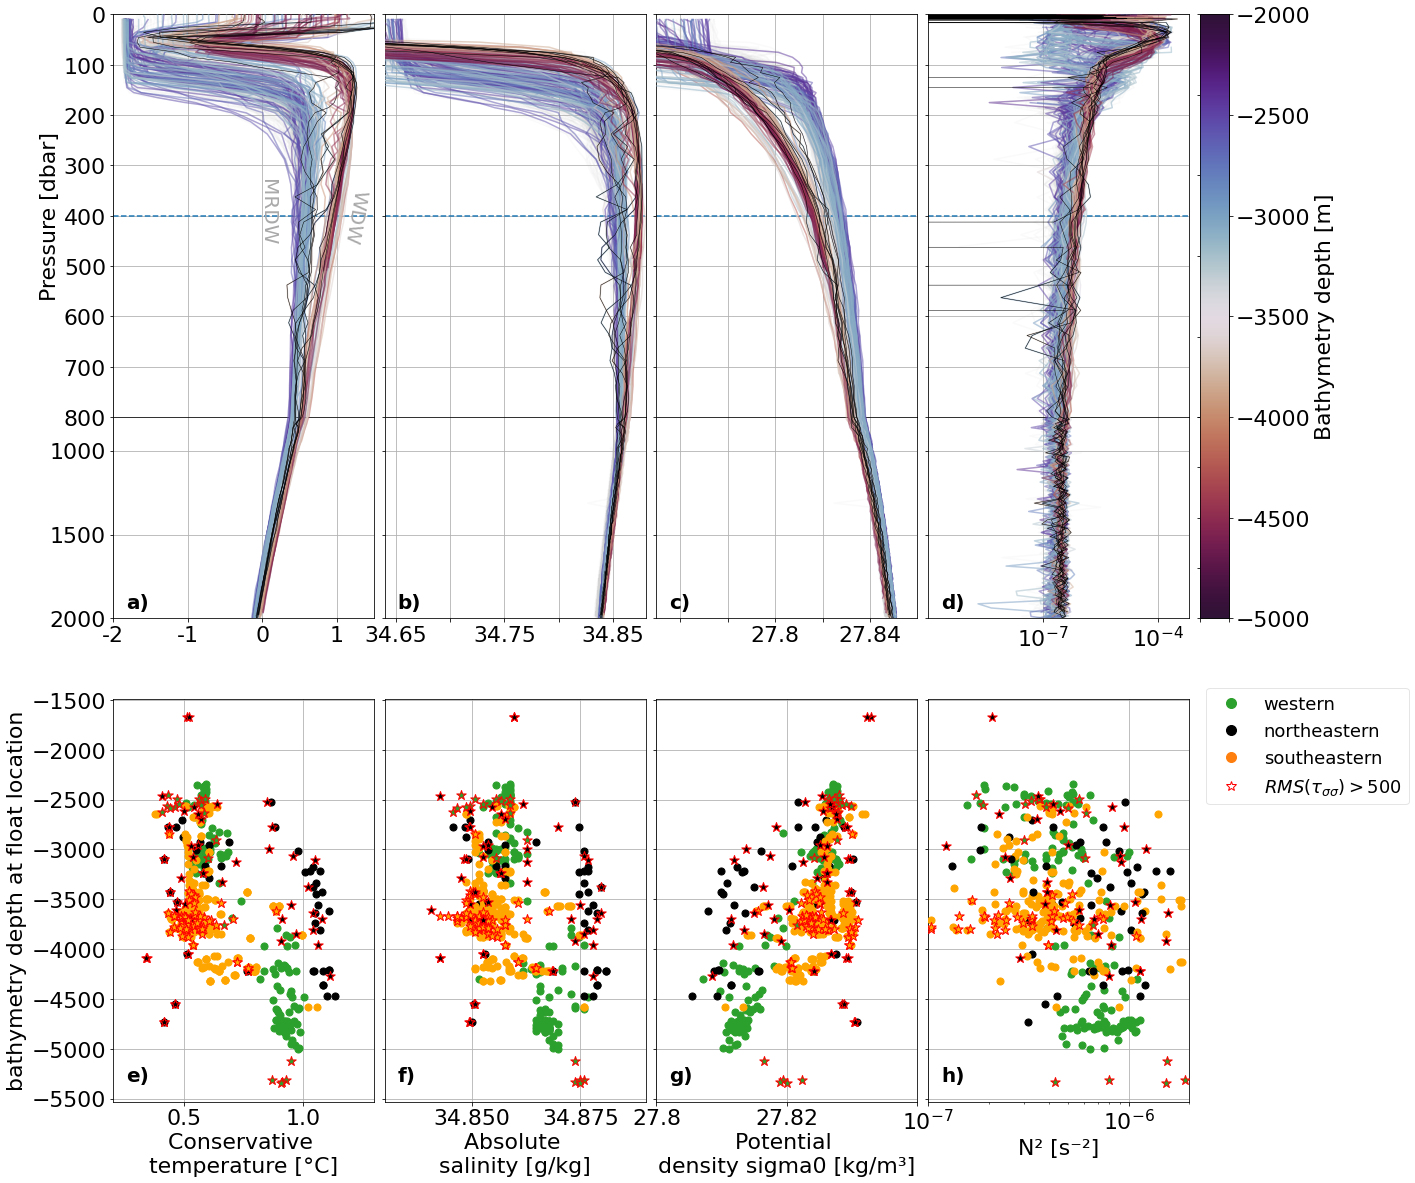

In [18]:
original_method = True

plt.rc('font', size=22)
importlib.reload(utils)

# As above but with bottom slope. Needs execution of bathymetry_depth code above first
variables = ['tem', 'sal', 'den', 'nsq']
#years = numpy.arange(2018,2020,1) # limit this until 2020!!!!!!!!!!!!!!!!
#months = numpy.arange(1,13,1)
variables_dictionary = dict(tem='Conservative \ntemperature [°C]',
                           sal='Absolute \nsalinity [g/kg]',
                           den='Potential \ndensity sigma0 [kg/m³]',
                           gamman='Neutral \ndensity [kg/m³]',
                           spice='Spice \n[kg/m³]',
                           nsq='N² [s⁻²]')
#for i in range(2,13):
#gs_top = plt.GridSpec(3, 5, top=0.95)
#gs_base = plt.GridSpec(3, 5, hspace=0)
#fig = plt.figure()

# Top (unshared) axes
#axs = gs_top#fig.add_subplot(gs_top[0:2,:])

fig, axs = plt.subplots(nrows=4, ncols=5,
                        gridspec_kw={'width_ratios':[9,9,9,9,1], 'wspace':0.05, 'hspace':0.0,
                                     'height_ratios':[2,1,0.4,2]}, figsize=[20,20])#, sharex='col')


datestart = datetime.date(2018,12,1)
dateend = datetime.date(2020,4,1)

depthranges = [dict(min=-800, max=0),
               dict(min=-2000, max=-800)]
#months = numpy.arange(i-1,i,1)
for row in [0,1]:
    for index, variable in enumerate(variables):

        # norm = matplotlib.colors.Normalize(vmin=-50.0, vmax=50.0)
        # norm = matplotlib.colors.Normalize(vmin=-4500.0, vmax=-2500.0)
        # cmap = plt.cm.coolwarm_r
        norm = matplotlib.colors.Normalize(vmin=-5000., vmax=-2000.)
        cmap = plt.cm.twilight_shifted_r


        for rmsindex in [130,131,149,150, 133, 147, 148, 152, 153]: # for WDW in MRDW
            #if variable == 'nsq':
            #    print('nuuu!')
            #    breakpoint()
            #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
            #                alpha=0.7, zorder=5, ls='-', color=rgba)#color='tab:blue', )
            profile = profiles[rmsindex].drop_duplicates(subset = ["sal"])
            N2, pmid = gsw.Nsquared(profile.rolling(2).mean()['sal'], 
                                    profile.rolling(2).mean()['tem'], 
                                   -profile.rolling(2).mean()['pre'])
            if variable == 'nsq':
                #axs[row][index].plot(N2, -pmid, color=rgba, alpha=0.5, zorder=3)
                axs[row][index].plot(N2, -pmid, 
                                alpha=1, zorder=5, ls='-', color='k', lw=0.5)
            else:
                axs[row][index].plot(profile[variable], profile['pre'], 
                                alpha=1, zorder=5, ls='-', color='k', lw=0.5)
                
            depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo

        #for rmsindex in [133, 147, 148, 152, 153]: # for MRDW in WDW
        #    #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #    #                alpha=1, zorder=5, ls='-', color=rgba) #color='tab:red'
        #    axs[row][index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #                    alpha=1, zorder=5, ls='-', color='k', lw=0.5)
        #    depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo

        profilescounter = 0
        for cycle in range(max(df['cyk']),2,-1):
            profile = df[df['cyk']==cycle]
            profile = profile.drop_duplicates(subset = ["sal"])
            if len(profile)==0:
                continue
                
            upperdepthlimit = 10
            lowerdepthlimit= 1600
            #smprofile = utils.smooth_profile(profile, smooth_params=dict(sal=0.00005, tem=0.00015, den=0.00005),
            #                           upperdepthlimit=upperdepthlimit, 
            #                           lowerdepthlimit=lowerdepthlimit, skipnan=True)
            #if smprofile:
            N2, pmid = gsw.Nsquared(profile.rolling(2).mean()['sal'], 
                                    profile.rolling(2).mean()['tem'], 
                                   -profile.rolling(2).mean()['pre'])
            N2[N2<=0] = numpy.nan
            #else:
            #    pass
                #print('skipped one')

            # unsaubere Loesung
            #profile['nsq'] = numpy.append(N2, N2[-1])

            if (profile.iloc[0].dates.date()-datestart > datetime.timedelta(days=0)) and (
                profile.iloc[0].dates.date()-dateend < datetime.timedelta(days=0)):
            #if (profile.iloc[0].dates.year in years) and (
            #    profile.iloc[0].dates.month in months):
                try:
                    depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo#_grady
                except:
                    continue
                profilescounter += 1
                rgba = cmap(norm(depth))
                if variable == 'nsq':
                    axs[row][index].plot(N2, -pmid, color=rgba, alpha=0.5, zorder=3)
                else:
                    axs[row][index].plot(profile[variable], profile['pre'], color=rgba, alpha=0.5, zorder=3)
            else:
                if variable == 'nsq':
                    axs[row][index].plot(N2, -pmid, color='lightgrey', alpha=0.1, zorder=-2)
                else:
                    axs[row][index].plot(profile[variable], profile['pre'], color='lightgrey', alpha=0.1, zorder=-2)
        axs[3][index].set_xlabel(variables_dictionary[variable])
        axs[row][index].grid(zorder=0)
        axs[row][index].set_ylim(depthranges[row]['min'],depthranges[row]['max'])
        # axs[row][0].text(x=0, y=-300, s='Mein Text')
    axs[row][0].set_xlim(-2,1.5)
    axs[row][0].set_xticks([-2,-1,0,1])
    axs[row][0].set_xticklabels([-2,-1,0,1])
    
    axs[row][1].set_xlim(34.64,34.88)
    axs[row][1].set_xticks(numpy.arange(34.65,34.88,0.05))
    axs[row][1].set_xticklabels(['34.65', '', '34.75', '', '34.85'])
    axs[row][2].set_xlim(27.75,27.86)
    axs[row][2].set_xticks(numpy.arange(27.76,27.86,0.02))
    axs[row][2].set_xticklabels(['','','27.8', '','27.84'])
    #axs[row][2].set_xlim(0,0.005)
    #axs[row][3].set_xlim(-0.00005,0.0003)
    axs[row][3].set_xscale('log')

    #axs[row][2].set_xlim(28,28.3)
    axs[row][1].set_yticklabels([])
    axs[row][2].set_yticklabels([])
    #axs[row][3].set_yticklabels([])
    axs[row][4].set_yticklabels([])

        
# fig.suptitle('float: %s, start: %s end:%s'%(title, datestart, dateend), y=0.93)
axs[0][0].set_ylabel('Pressure [dbar]')
axs[0][0].set_yticks([0,-100,-200,-300,-400,-500,-600,-700,-800])
axs[0][0].set_yticklabels(['0','100','200','300','400','500','600','700','800'])
axs[1][0].set_yticks([-1000, -1500, -2000])
axs[1][0].set_yticklabels(['1000', '1500', '2000'])

# ax3 = fig.add_subplot(gs[:, 3])
gs = axs[1, 2].get_gridspec()
axbig = fig.add_subplot(gs[:2, -1])

cb1 = matplotlib.colorbar.ColorbarBase(axbig, cmap=cmap,
                                norm=norm,)
                                #orientation='horizontal')

#removing the 'labels' from the colorbar
axs[0,3].set_yticklabels([])
axs[1,3].set_yticklabels([])
#axs[1,3].set_xticklabels([])
axs[1,4].set_xticklabels([])

cb1.set_label('Bathymetry depth [m]')
print('%s profiles were plotted'%profilescounter)
for row in [1]:
    for n, ax in enumerate(axs[row][0:4]):
        axs[0][n].axhline(y=-400, linestyle='--')
        ax.text(0.05, 0.05, string.ascii_lowercase[n]+')', transform=ax.transAxes, 
                size=20, weight='bold')


axs[0][0].text(x=-0.05, y=-450, s='MRDW', size=20, color='darkgrey', rotation=-90)
axs[0][0].text(x=1.05, y=-450, s='WDW', size=20, color='darkgrey', rotation=-100)

for i in [0,1,2,3,4]:
    axs[2][i].remove()
    axs[0][i].set_xticklabels([])
        
plt.tight_layout()
#plt.savefig('../plots/figures/figure3_new3.png', dpi=300, bbox_inches='tight')
#plt.show()


# end of profileplots
# start of scatterplots
comparedepth = 400
    
#plt.rc('font', size=20)
#fig, axs = plt.subplots(nrows=1, ncols=3, gridspec_kw={'width_ratios':[5,5,5], 'hspace':0.1}, figsize=[20,10])#, sharey=True)
years = numpy.arange(2018,2022,1)
months = numpy.arange(1,13,1)

filenames = {'300234067208900.nc':'blue',
             '300234068638900.nc':'red',
             '5904468_Mprof.nc':'orange', 
             '5904471_Mprof.nc':'purple', 
             'GL_PR_PF_5903616.nc':'brown',
             'GL_PR_PF_7900640.nc':'green', 
             'GL_PR_PF_5905382.nc':'olive',
             }


variables = ['tem', 'sal', 'den', 'nsq']
colorby='region'
edgecolorby='rms'


utils.plot_colored_figure(years=years, months=months, filenames=filenames, 
                variables=variables, mode='scatter', colorby=colorby, 
                edgecolorby=edgecolorby, comparedepth=comparedepth,
                axs=axs[3][:], original_method=original_method)

axs[3][1].set_yticklabels([])
axs[3][2].set_yticklabels([])
axs[3][3].set_yticklabels([])
axs[3][4].set_yticklabels([])
axs[3][4].remove()

axs[3][0].set_xlim(0.2,1.3)
axs[3][1].set_xlim(34.83,34.89)
axs[3][2].set_xlim(27.8,27.84)
axs[3][2].set_xticks([27.8,27.82,27.84])
axs[3][2].set_xticklabels(['27.8', '27.82', ''])
axs[3][3].set_xscale('log')
axs[3][3].set_xlim(1e-7,2e-6)



for n, ax in enumerate(axs[3][0:4]): 
    ax.text(0.05, 0.05, string.ascii_lowercase[n+4]+')', transform=ax.transAxes, 
            size=20, weight='bold')
    ax.grid()
    
blue_dot = mlines.Line2D([], [], color='tab:green', marker='o', linestyle='None',
                          markersize=10, label='western')
black_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=10, label='northeastern')
orange_dot = mlines.Line2D([], [], color='tab:orange', marker='o', linestyle='None',
                          markersize=10, label='southeastern')
if original_method:
    red_star = mlines.Line2D([], [], color='white', markeredgecolor='red', marker='*', linestyle='None',
                          markersize=10, label=r'$RMS(\tau_{\sigma \sigma})>500$')
else:
    red_star = mlines.Line2D([], [], color='white', markeredgecolor='red', marker='*', linestyle='None',
                          markersize=10, label=r'$RMS(\tau_{\sigma \sigma})>5000$')
axs[3][3].legend(handles=[blue_dot, black_dot, orange_dot, red_star], fontsize=18,
                framealpha=0.5, bbox_to_anchor=(1.03, 1.05))
#plt.legend()

print('Maybe asking Chscherbina for advice about the high sp curvature values also')
plt.savefig('../plots/figures/figure3.png', dpi=200)
plt.show()


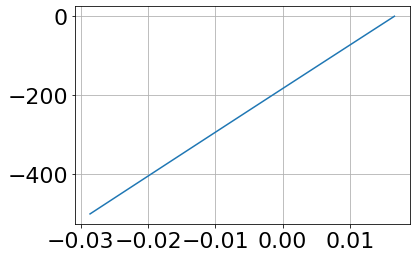

In [6]:
#plt.plot(gsw.rho(34.8, 1, numpy.linspace(0,1000, 101)), -numpy.linspace(0,1000, 101))
#plt.plot(gsw.rho(34.6, -1.8, numpy.linspace(0,1000, 101)), -numpy.linspace(0,1000, 101))
plt.plot(gsw.rho(34.85, 1, numpy.linspace(0,500, 51))-gsw.rho(34.66, -1.9, numpy.linspace(0,500, 51)), 
         -numpy.linspace(0,500, 51))
#plt.plot(gsw.rho(34.79, 1, numpy.linspace(0,500, 51))-gsw.rho(34.66, -1.9, numpy.linspace(0,500, 51)), 
#         -numpy.linspace(0,500, 51), color='red')
plt.grid()

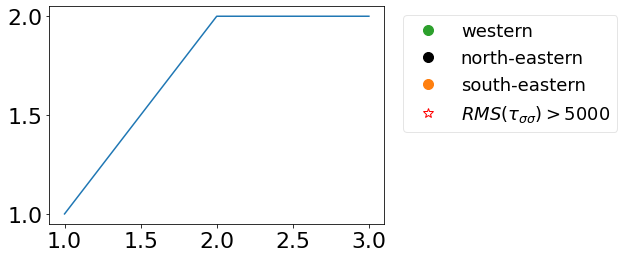

In [7]:
plt.plot([1,2,3],[1,2,2])
blue_dot = mlines.Line2D([], [], color='tab:green', marker='o', linestyle='None',
                          markersize=10, label='western')
black_dot = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=10, label='north-eastern')
orange_dot = mlines.Line2D([], [], color='tab:orange', marker='o', linestyle='None',
                          markersize=10, label='south-eastern')
red_star = mlines.Line2D([], [], color='white', markeredgecolor='red', marker='*', linestyle='None',
                          markersize=10, label=r'$RMS(\tau_{\sigma \sigma})>5000$')
plt.legend(handles=[blue_dot, black_dot, orange_dot, red_star], fontsize=18,
                framealpha=0.5, bbox_to_anchor=(1.03, 1.00))
#plt.legend(bbox_to_anchor=(1.2, 1.00))

Returning previously computed DataFrame...
71 profiles were plotted


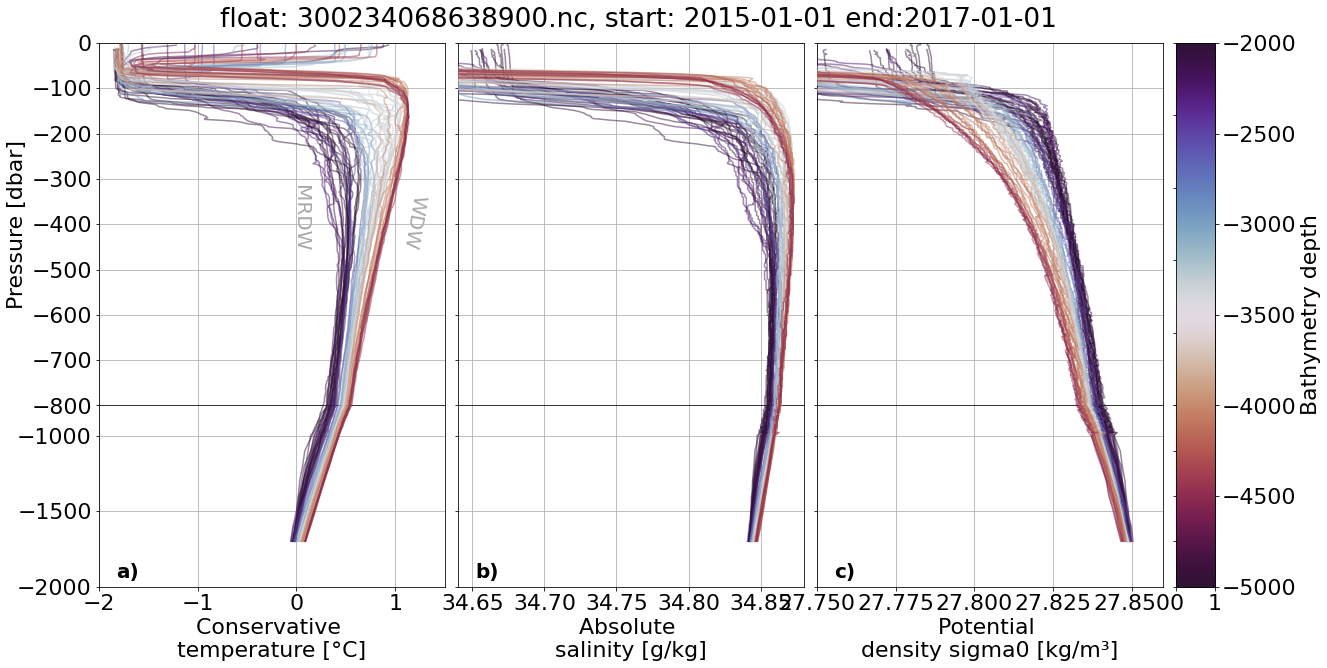

In [8]:
df, profiles = utils.create_dataframe(pfloat='5904471_Mprof.nc', force_reconstruction=False)
df_col = xarray.open_dataset('../data/collocation_5904471_Mprof.nc'); #title='300234067208900'

#df, profiles = utils.create_dataframe(pfloat='5904468_Mprof.nc', force_reconstruction=False)
#df_col = xarray.open_dataset('../data/collocation_5904468_Mprof.nc'); #title='300234067208900'

variables = ['tem', 'sal', 'den']#, 'nsq']
#years = numpy.arange(2018,2020,1) # limit this until 2020!!!!!!!!!!!!!!!!
#months = numpy.arange(1,13,1)
#for i in range(2,13):
fig, axs = plt.subplots(nrows=2, ncols=4,
                        gridspec_kw={'width_ratios':[9,9,9,1], 'wspace':0.05, 'hspace':0.0,
                                     'height_ratios':[2,1]}, figsize=[20,10], sharex='col')

datestart = datetime.date(2015,1,1)
dateend = datetime.date(2017,1,1)

depthranges = [dict(min=-800, max=0),
               dict(min=-2000, max=-800)]
#months = numpy.arange(i-1,i,1)
for row in [0,1]:
    for index, variable in enumerate(variables):

        # norm = matplotlib.colors.Normalize(vmin=-50.0, vmax=50.0)
        norm = matplotlib.colors.Normalize(vmin=-5000.0, vmax=-2000.0)
        cmap = plt.cm.twilight_shifted_r


        """
        for rmsindex in [130,131,149,150, 133, 147, 148, 152, 153]: # for WDW in MRDW
            #if variable == 'nsq':
            #    print('nuuu!')
            #    breakpoint()
            #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
            #                alpha=0.7, zorder=5, ls='-', color=rgba)#color='tab:blue', )
            profile = profiles[rmsindex].drop_duplicates(subset = ["sal"])
            N2, pmid = gsw.Nsquared(profile.rolling(2).mean()['sal'], 
                                    profile.rolling(2).mean()['tem'], 
                                   -profile.rolling(2).mean()['pre'])
            if variable == 'nsq':
                #axs[row][index].plot(N2, -pmid, color=rgba, alpha=0.5, zorder=3)
                axs[row][index].plot(N2, -pmid, 
                                alpha=1, zorder=1, ls='-', color='k', lw=0.5)
            else:
                axs[row][index].plot(profile[variable], profile['pre'], 
                                alpha=1, zorder=1, ls='-', color='k', lw=0.5)
                
            depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo
        """
        #for rmsindex in [133, 147, 148, 152, 153]: # for MRDW in WDW
        #    #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #    #                alpha=1, zorder=5, ls='-', color=rgba) #color='tab:red'
        #    axs[row][index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
        #                    alpha=1, zorder=5, ls='-', color='k', lw=0.5)
        #    depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo

        profilescounter = 0
        for cycle in range(max(df['cyk']),2,-1):
            profile = df[df['cyk']==cycle]
            profile = profile.drop_duplicates(subset = ["sal"])
            if len(profile)==0:
                continue
                
            upperdepthlimit = 10
            lowerdepthlimit= 1600
            #smprofile = utils.smooth_profile(profile, smooth_params=dict(sal=0.00005, tem=0.00015, den=0.00005),
            #                           upperdepthlimit=upperdepthlimit, 
            #                           lowerdepthlimit=lowerdepthlimit, skipnan=True)
            #if smprofile:
            N2, pmid = gsw.Nsquared(profile.rolling(2).mean()['sal'], 
                                    profile.rolling(2).mean()['tem'], 
                                   -profile.rolling(2).mean()['pre'])
            # N2[N2<=0] = numpy.nan
            #else:
            #    pass
                #print('skipped one')

            # unsaubere Loesung
            #profile['nsq'] = numpy.append(N2, N2[-1])

            if (profile.iloc[0].dates.date()-datestart > datetime.timedelta(days=0)) and (
                profile.iloc[0].dates.date()-dateend < datetime.timedelta(days=0)):
            #if (profile.iloc[0].dates.year in years) and (
            #    profile.iloc[0].dates.month in months):
                try:
                    depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo#_grady
                except:
                    continue
                profilescounter += 1
                rgba = cmap(norm(depth))
                if variable == 'nsq':
                    axs[row][index].plot(N2, -pmid, color=rgba, alpha=0.5, zorder=3)
                else:
                    axs[row][index].plot(profile[variable], profile['pre'], color=rgba, alpha=0.5, zorder=3)
            else:
                if variable == 'nsq':
                    axs[row][index].plot(N2, -pmid, color='lightgrey', alpha=0., zorder=-2)
                else:
                    axs[row][index].plot(profile[variable], profile['pre'], color='lightgrey', alpha=0., zorder=-2)
        axs[1][index].set_xlabel(variables_dictionary[variable])
        axs[row][index].grid(zorder=0)
        axs[row][index].set_ylim(depthranges[row]['min'],depthranges[row]['max'])
        # axs[row][0].text(x=0, y=-300, s='Mein Text')
    axs[row][0].set_xlim(-2,1.5)
    axs[row][1].set_xlim(34.64,34.88)
    axs[row][2].set_xlim(27.75,27.86)
    #axs[row][3].set_xlim(-0.00005,0.0003)
    #axs[row][3].set_xscale('log')

    #axs[row][2].set_xlim(28,28.3)
    axs[row][1].set_yticklabels([])
    axs[row][2].set_yticklabels([])
    axs[row][3].set_yticklabels([])
    #axs[row][4].set_yticklabels([])

        
fig.suptitle('float: %s, start: %s end:%s'%(title, datestart, dateend), y=0.93)
axs[0][0].set_ylabel('Pressure [dbar]')

# ax3 = fig.add_subplot(gs[:, 3])
gs = axs[1, 2].get_gridspec()
axbig = fig.add_subplot(gs[:, -1])

cb1 = matplotlib.colorbar.ColorbarBase(axbig, cmap=cmap,
                                norm=norm,)
                                #orientation='horizontal')

#removing the 'labels' from the colorbar
axs[0,3].set_yticklabels([])
axs[1,3].set_yticklabels([])
#axs[1,3].set_xticklabels([])
#axs[1,4].set_xticklabels([])

cb1.set_label('Bathymetry depth')
print('%s profiles were plotted'%profilescounter)
for row in [1]:
    for n, ax in enumerate(axs[row][0:4]):   
        ax.text(0.05, 0.05, string.ascii_lowercase[n]+')', transform=ax.transAxes, 
                size=20, weight='bold')


axs[0][0].text(x=-0.05, y=-450, s='MRDW', size=20, color='darkgrey', rotation=-90)
axs[0][0].text(x=1.05, y=-450, s='WDW', size=20, color='darkgrey', rotation=-100)

        
plt.tight_layout()
plt.savefig('../plots/figures/figure3_SOCCOM71.png', dpi=300, bbox_inches='tight')
plt.show()

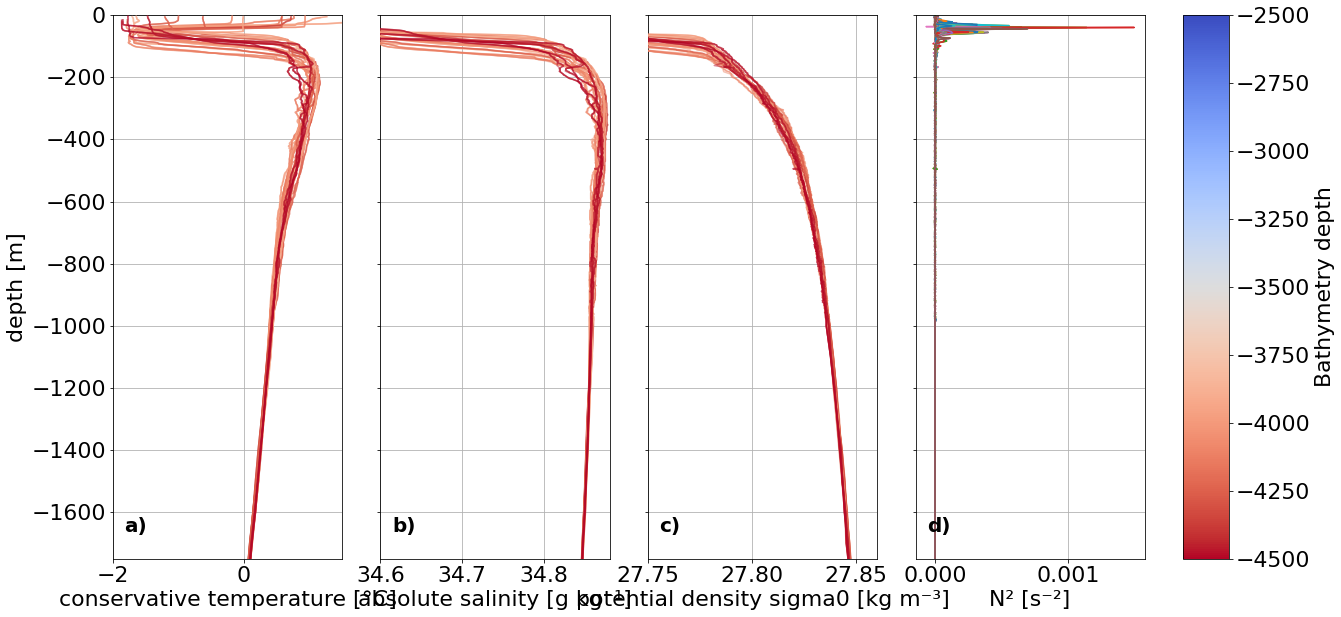

In [9]:
# modified in a hurry for presentation
# As above but with bottom slope. Needs execution of bathymetry_depth code above first
variables = ['tem', 'sal', 'den', 'nsq']
#years = numpy.arange(2018,2020,1) # limit this until 2020!!!!!!!!!!!!!!!!
#months = numpy.arange(1,13,1)
datestart = datetime.date(2018,12,1)
dateend = datetime.date(2020,4,1)
variables_dictionary = dict(tem='conservative temperature [°C]',
                           sal='absolute salinity [g kg⁻¹]',
                           den='potential density sigma0 [kg m⁻³]',
                           gamman='neutral density [kg m⁻³]',
                           spice='spice [kg m⁻³]',
                           nsq='N² [s⁻²]')
#for i in range(2,13):
fig, axs = plt.subplots(nrows=1, ncols=5, gridspec_kw={'width_ratios':[5,5,5,5,1], 'hspace':0.2}, figsize=[20,10])#, sharey=True)
#fig2, axs2 = plt.subplots()

#months = numpy.arange(i-1,i,1)
for index, variable in enumerate(variables):

    # norm = matplotlib.colors.Normalize(vmin=-50.0, vmax=50.0)
    norm = matplotlib.colors.Normalize(vmin=-4500.0, vmax=-2500.0)
    cmap = plt.cm.coolwarm_r

    for cycle in range(2, max(df['cyk'])):
        profile = df[df['cyk']==cycle]
        profile['spice'] = gsw.spiciness0(profile['sal'], profile['tem'])
        #profile['nsq'] = gsw.Nsquared(profile['sal'], profile['tem'], profile['pre'])
        nsq, pmid = gsw.Nsquared(profile['sal'].values, profile['tem'].values, -profile['pre'].values)

        if len(profile)==0:
            continue
        if (profile.iloc[0].dates.date()-datestart > datetime.timedelta(days=0)) and (
            profile.iloc[0].dates.date()-dateend < datetime.timedelta(days=0)): 
        #if (profile.iloc[0].dates.year in years) and (
        #    profile.iloc[0].dates.month in months):
            try:
                depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo#_grady
            except:
                continue
            rgba = cmap(norm(depth))
            if variable == 'nsq':
                # print('nsq-prof %s'%index)
                #axs2.plot(nsq, -pmid, color=rgba, alpha=0.5, zorder=3)
                axs[index].plot(nsq, -pmid)
                #breakpoint()
            else:
                axs[index].plot(profile[variable], profile['pre'], color=rgba, alpha=0.5, zorder=3)
        else:
            pass
        #print(cycle)
    #plt.show()
            #plt.plot(profile[variable], profile['pre'], color='lightgrey', alpha=0.5, zorder=-2)

    axs[index].set_xlabel(variables_dictionary[variable])
    axs[index].grid(zorder=0)
    axs[index].set_ylim(-1750,0)

# fig.suptitle('float: %s, years: %s'%(title, years), y=0.93)
axs[0].set_ylabel('depth [m]')
axs[0].set_xlim(-2,1.5)
axs[1].set_xlim(34.6,34.88)
axs[2].set_xlim(27.75,27.86)
#axs[2].set_xlim(28,28.3)
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
axs[3].set_yticklabels([])
cb1 = matplotlib.colorbar.ColorbarBase(axs[len(variables)], cmap=cmap,
                                norm=norm,)
                                #orientation='horizontal')

cb1.set_label('Bathymetry depth')

for n, ax in enumerate(axs[0:4]):   
    ax.text(0.05, 0.05, string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=20, weight='bold')
plt.savefig('../plots/figures/figure3_new2.png', dpi=300)
plt.show()

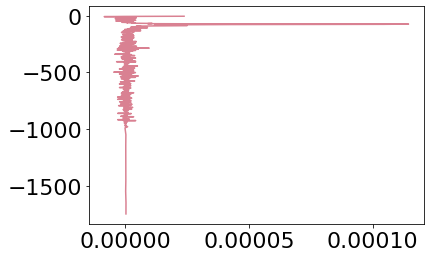

In [10]:
fig2, axs2 = plt.subplots()
axs2.plot(nsq, -pmid, color=rgba, alpha=0.5, zorder=3)
plt.show()

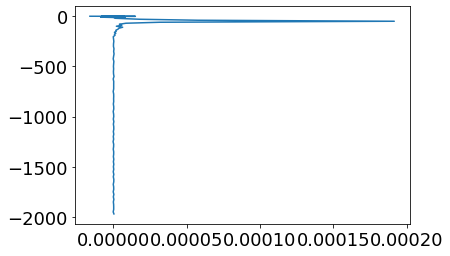

array([-1.58230992e-05,  1.51380637e-05, -8.09964165e-06, -3.49342845e-07,
        7.90902991e-06, -8.08573696e-06, -3.49283722e-07,  8.24655020e-06,
       -3.49244038e-07, -8.53514722e-06,  2.89430490e-07,  1.18773962e-06,
        1.80499137e-05,  5.76818688e-05,  1.91424405e-04,  3.17008769e-05,
        8.70853732e-06,  4.25752346e-06,  5.89539607e-06,  2.18631503e-06,
        6.47686034e-06,  3.88308288e-06,  3.20372151e-06,  1.78916053e-06,
        2.08588910e-06,  8.72938770e-07,  1.78620797e-06,  8.56293005e-07,
        1.26539163e-06,  7.07799542e-08,  2.38226882e-07,  4.52328956e-07,
        2.47557801e-07,  2.14095394e-07,  5.54935151e-07,  3.43971715e-07,
        5.96003292e-07,  2.98111007e-07,  4.64695176e-08,  4.69396184e-07,
        3.27890679e-07,  2.12235855e-07,  3.26282402e-07,  1.91295972e-07,
        2.60473002e-07,  5.63517162e-07,  4.33440155e-08,  3.83451467e-07,
        3.55923316e-07,  3.59601561e-07,  3.56442782e-07,  2.54493313e-08,
        3.46126169e-07,  

In [8]:
plt.plot(nsq, -pmid)
plt.show()
nsq

In [9]:
original_method=True
normdict = dict(
    depth_topo=matplotlib.colors.Normalize(vmin=-4500.0, vmax=-2500.0),
    slope=matplotlib.colors.Normalize(vmin=0, vmax=50),
    longitude=matplotlib.colors.Normalize(vmin=0, vmax=200),#6),
    latitude=matplotlib.colors.Normalize(vmin=-67, vmax=-63.5))
cmapdict = dict(
    depth_topo=plt.cm.coolwarm_r,
    slope=plt.cm.Greys,
    longitude=plt.cm.cividis,
    latitude=plt.cm.cividis)


def profile_colors(profiles, df_col, condition):
    # condition can be: slope, depth, longitude, latitude
    # define facecolors of the profiles or scatters
    results = []
    df_col['slope'] = numpy.sqrt(df_col['depth_topo_gradx']**2+df_col['depth_topo_grady']**2)
    norm = normdict[condition]
    for pindex,profile in enumerate(profiles):
        resultsdict = dict(index=pindex, color=None, zorder=None)
        #resultsdict['index']=pindex
        #value = df_col.sel(expver=5).isel(time=10)[condition]
        try:
            value = df_col.sel(time=profile.iloc[0].dates.to_pydatetime())[condition]
        except:
            # print('missing out one profile')
            resultsdict['color']='lightgrey'#colors.append('lightgrey')
            resultsdict['zorder']=-1#zorders.append(-1)
            continue
        rgba = cmapdict[condition](normdict[condition](value))
        resultsdict['color']=rgba#colors.append(rgba)
        #indices.append(index)
        resultsdict['zorder']=1#zorders.append(1)
        #print(resultsdict)
        results.append(resultsdict)
    return pandas.DataFrame(results).set_index('index')#results#colors, zorders, indices

def profile_threshold_colors(profiles, df_col, condition, key):
    # define edgecolors, e.g. for rms mixing profiles
    results = []
    df_col['slope'] = numpy.sqrt(df_col['depth_topo_gradx']**2+df_col['depth_topo_grady']**2)
    rmsdeep, indices, dates = utils.compute_diapycnal_spice_variations(
                                   profiles, 
                                   upperdepthlimit=500, 
                                   lowerdepthlimit=1600, 
                                   original_method=original_method)
    rms, indices, dates = utils.compute_diapycnal_spice_variations(
                                   profiles, 
                                   upperdepthlimit=250, 
                                   lowerdepthlimit=1600, 
                                   original_method=original_method)
    #if key in ['300234067208900.nc', '300234068638900.nc']:
    #    rmslimit=0.2e-5
    #else:
    #    rmslimit=1e-5
        
   
    for pindex, profile in enumerate(profiles):
        resultsdict = dict(index=pindex, color=None, zorder=None)
        try:
            depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo
            topoy = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo_grady
            topox = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo_gradx
            latitude = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).latitude
            longitude = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).longitude
        except:
            results.append(resultsdict)
            continue
            
        if condition in ['longitude', 'latitude', 'depth_topo', 'slope']:
            try:
                value = df_col.sel(time=profile.iloc[0].dates.to_pydatetime())[condition]
            except:
                # print('missing out one profile')
                resultsdict['color']='lightgrey'#colors.append('lightgrey')
                resultsdict['zorder']=-1#zorders.append(-1)
                continue
            rgba = cmapdict[condition](normdict[condition](value))
            resultsdict['color']=rgba#colors.append(rgba)
            #indices.append(index)
            resultsdict['zorder']=1#zorders.append(1)
            #print(resultsdict)
            #results.append(resultsdict)

        if condition == 'rms':
            if pindex == 0:
                # first profile is often noisy/wrong
                results.append(resultsdict)
                continue

            if rms[pindex]>rmslimit:
                resultsdict['color']='red'
                resultsdict['zorder']=4
            else:
                resultsdict['color']=None
                resultsdict['zorder']=3
                
        if condition == 'floatkey':
            resultsdict['color']=filenames[key]#[filenames[key]*len(df_col)]
            
        if condition == 'region':
            boxes = [dict(x=2.05, y=-64.7, w=5, h=2, color='black'),
                     dict(x=-2.5, y=-67, w=4.5, h=4, color='tab:blue'),
                     dict(x=2.05, y=-67, w=5, h=2.25, color='orange')]
            #for element in df_col:
            #    breakpoint()
            #    latitude = element.latitude
            #    longitude = element.longitude
            color = 'lightgrey' # this is the scatter outside of all boxes
            for box in boxes:
                if ((longitude>box['x']) and (longitude<box['x']+box['w']) and
                    (latitude>box['y']) and (latitude<box['y']+box['h'])):
                     resultsdict['color']=box['color']
                if not resultsdict['color']:
                    resultsdict['color']='lightgrey'
        results.append(resultsdict)
    return pandas.DataFrame(results).set_index('index')#results#sdict#colors, zorders

filenames = {'300234067208900.nc':'blue',
             #'300234068638900.nc':'red',
             #'5904468_Mprof.nc':'orange', 
             #'5904471_Mprof.nc':'purple', 
             #'GL_PR_PF_5903616.nc':'brown',
             #'GL_PR_PF_7900640.nc':'green', 
             #'GL_PR_PF_5905382.nc':'olive',
             }

variables_dictionary = dict(tem='conservative temperature [°C]',
                           sal='absolute salinity [g/kg]',
                           den='potential density sigma0 [kg/m³]',
                           gamman='neutral density [kg/m³]',
                           spice='spice [kg/m³]')

def plot_colored_figure(years, months, filenames, variables, mode, colorby, edgecolorby, comparedepth, axs):
    # mode should by either scatter or profile 
    #years = year#numpy.arange(2018,2020,1)#[2015,2016,2017,2018,2019,2020,2021]#,2017,2018,2019]#2018,2019,2020]
    #months = [1,2,3,4,5,6,7,8,9,10,11,12]
    for key in filenames.keys():
        df, profiles = utils.create_dataframe(pfloat=key, force_reconstruction=False)
        df_col = xarray.open_dataset('../data/collocation_%s'%key)
        title=key
        results = profile_threshold_colors(profiles, df_col, colorby, key)#'latitude')
        threshold_results = profile_threshold_colors(profiles, df_col, edgecolorby, key)
        for index, variable in enumerate(variables):#['tem', 'sal', 'den', 'spice']):
            for pindex, profile in enumerate(profiles):
                
                if pindex == 0:
                    # first profile is often noisy/wrong
                    continue
                if len(profile)==0:
                    continue
                profile['spice'] = gsw.spiciness0(profile['sal'], profile['tem'])
                if (profile.iloc[0].dates.year in years) and (
                    profile.iloc[0].dates.month in months):
                    try:
                        depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo
                    except:
                        continue

                    if mode == 'profile':
                        axs[index].plot(profile[variable], profile['pre'], 
                                        color=results.loc[pindex]['color'], alpha=0.5, 
                                        zorder=results.loc[pindex]['zorder'])

                    else: # (mode == 'scatter')
                        comparedepth = comparedepth#350
                        where = 'at %sm depth'%comparedepth
                        if numpy.nanmin(profile['pre']+comparedepth) > 20:
                            # This profile has new value that is sufficiently close to 400m depth
                            print('sorted out profile in %s'%key)
                            continue
                        depthindex = numpy.argmin(abs(profile['pre']+comparedepth)) # depth index closest to the summand
                        edgecolor=threshold_results.loc[pindex]['color']
                        if results.loc[pindex]['color'] == 'lightgrey':
                            continue
                        axs[index].scatter(profile[variable].values[depthindex], depth, 
                                           color=results.loc[pindex]['color'], zorder=results.loc[pindex]['zorder'],
                                           edgecolor=threshold_results.loc[pindex]['color'])
            if mode == 'scatter':
                axs[index].set_xlabel(variables_dictionary[variable]+'\n'+where)
            #axs[index].grid(zorder=100)
        axs[0].set_ylabel('bathymetry depth at float location')
            #else:
                # This is in case the profile is not in the date range specified first
            #    axs[index].plot(profile[variable], profile['pre'], color='lightgrey', alpha=0.5, zorder=-2)

Returning previously computed DataFrame...


IndexError: list index out of range

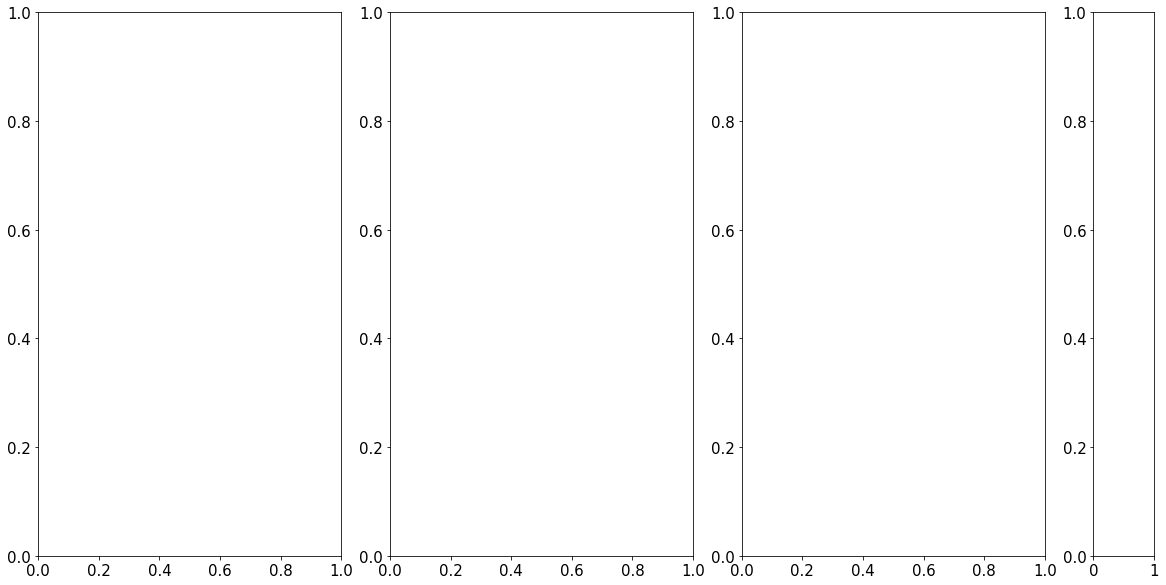

In [10]:
plt.rc('font', size=15)
fig, axs = plt.subplots(nrows=1, ncols=4, gridspec_kw={'width_ratios':[5,5,5,1], 'hspace':0.2}, figsize=[20,10])#, sharey=True)
years = numpy.arange(2014,2017,1)
months = numpy.arange(1,13,1)

filenames = {'300234067208900.nc':'blue',
             '300234068638900.nc':'red',
             '5904468_Mprof.nc':'orange', 
             '5904471_Mprof.nc':'purple', 
             'GL_PR_PF_5903616.nc':'brown',
             'GL_PR_PF_7900640.nc':'green', 
             'GL_PR_PF_5905382.nc':'olive',
             }
filenames = {'5904471_Mprof.nc':'blue',}
variables = ['tem', 'sal', 'den']
colorby='depth_topo'
edgecolorby='rms'
plot_colored_figure(years=years, months=months, filenames=filenames, 
                    variables=variables, mode='profile', colorby=colorby, edgecolorby=edgecolorby, 
                    axs=axs, comparedepth=400)
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

#for n, ax in enumerate(axs):
#    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
#            size=20, weight='bold')

cb1 = matplotlib.colorbar.ColorbarBase(axs[len(variables)], cmap=cmapdict[colorby],
                                norm=normdict[colorby],)
cb1.set_label(colorby)

Returning previously computed DataFrame...


IndexError: list index out of range

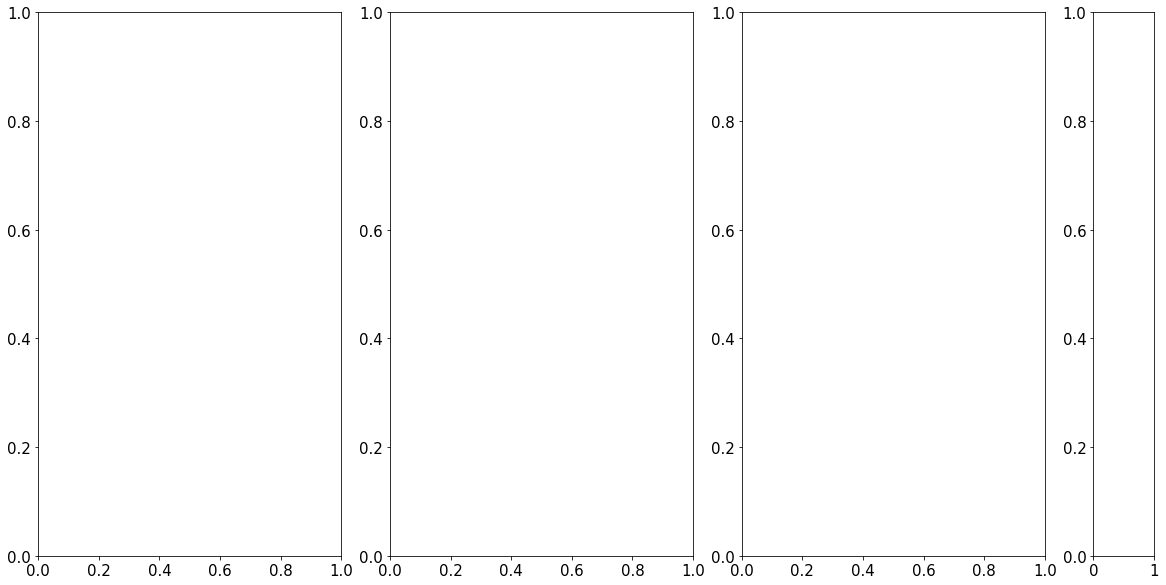

In [11]:

comparedepth = 400
    
plt.rc('font', size=15)
fig, axs = plt.subplots(nrows=1, ncols=4, gridspec_kw={'width_ratios':[5,5,5,1], 'hspace':0.2}, figsize=[20,10])#, sharey=True)
years = numpy.arange(2018,2022,1)
months = numpy.arange(1,13,1)
#filenames = {'300234067208900.nc':'blue',}
filenames = {'300234067208900.nc':'blue',
             '300234068638900.nc':'red',
             '5904468_Mprof.nc':'orange', 
             '5904471_Mprof.nc':'purple', 
             'GL_PR_PF_5903616.nc':'brown',
             'GL_PR_PF_7900640.nc':'green', 
             'GL_PR_PF_5905382.nc':'olive',
             }
variables = ['tem', 'sal', 'den']
colorby='region'
edgecolorby='rms'

plot_colored_figure(years=years, months=months, filenames=filenames, 
                variables=variables, mode='scatter', colorby=colorby, 
                edgecolorby=edgecolorby, comparedepth=comparedepth,
                axs=axs)
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

axs[0].set_xlim(0.2,1.3)
axs[1].set_xlim(34.82,34.9)
axs[2].set_xlim(27.8,27.84)

for n, ax in enumerate(axs[0:3]):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

cb1.set_label(colorby)
plt.grid()
plt.savefig('example2_all_floats_%s.png'%comparedepth)
plt.show()

In [ ]:
# here I am playling to split the map into different regions
from cartopy import crs as ccrs
import netCDF4
import cmocean
import matplotlib.patches as mpatches
fig = plt.figure(figsize=[20,15])
# ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.SouthPolarStereo())#ccrs.PlateCarree())
#ax.add_coastlines()
etopofile = netCDF4.Dataset('../data/etopo1.nc')
lons, lats = numpy.meshgrid(etopofile.variables['lon'][:], etopofile.variables['lat'][:])
plt.rcParams['contour.negative_linestyle'] = 'solid'
colors = plt.contourf(lons, lats, etopofile.variables['Band1'][:], 30, transform=ccrs.PlateCarree(), map=cmocean.cm.deep_r,#cmap='Greys', 
    alpha=1, levels=numpy.arange(-6000,250,250))
extent = [-5,10,-70.5,-62]
#, ccrs.PlateCarree()
lonmin, lonmax, latmin, latmax = extent
ax.set_extent([lonmin, lonmax, latmax, latmin])#, ccrs.PlateCarree())
ax.gridlines(draw_labels=True, alpha=0.2)
boxes = [
dict(x=2.05, y=-64.7, w=5, h=2, color='k'),
dict(x=-2.5, y=-67, w=4.5, h=4, color='blue'),
dict(x=2.05, y=-67, w=5, h=2.25, color='orange')]
for box in boxes:
    ax.add_patch(mpatches.Rectangle(xy=[box['x'], box['y']], width=box['w'], height=box['h'],
                                    fill=False,
                                    transform=ccrs.PlateCarree(),
                                    linewidth=2,
                                    edgecolor=box['color']))


In [ ]:
import gsw
df, profiles = utils.create_dataframe(pfloat='old', force_reconstruction=False)
for i in range(142,151):
    plt.plot(profiles[i]['tem'], profiles[i]['pre'],label=i)
    print(i,profiles[i].dates.iloc[0])
plt.legend()
plt.show()


plt.plot(profiles[5]['den'], profiles[5]['pre'],label='deep southern ocean typical deep profile', color='tab:red')
plt.plot(profiles[120]['den'], profiles[120]['pre'],label='Maud Rise typical deep profile', color='tab:blue')
plt.xlim(27.7,27.85)
plt.ylim(-1000,0)
plt.legend()
plt.show()
#plt.plot(profiles[120]['rho']-profiles[5]['rho'], profiles[5]['pre'],label='%s typical deep profile'%i, color='tab:red')
#plt.plot(profiles[120]['rho'], profiles[120]['pre'],label='%s typical deep profile'%i, color='tab:blue')
plt.show()
#gsw.density.rho()


In [ ]:
from scipy.interpolate import griddata
import limits_ranges
importlib.reload(limits_ranges)

limits = limits_ranges.full_range()

dfold, oldprofiles = utils.create_dataframe(pfloat='old', force_reconstruction=False)
df = dfold
fig, axs = plt.subplots(nrows=3, figsize=[15,7])
limits.mins['den'] = 27.4
limits.maxs['den'] = 27.9

wmin = 132
wmax = 153

for index, variable in enumerate(['tem','sal','den']):

    xi, yi, grid_z0 = utils.create_datagrid(df=df, variable=variable)
    colors, lines = utils.create_contourplot(
        xi=xi, yi=yi, grid_z0=grid_z0, ax=axs[index], maxdepth=1000, cmap=limits.mcolors[variable],#cmocean.cm.haline, 
        vmin=limits.mins[variable], vmax=limits.maxs[variable], steplength=limits.steplengths[variable], locator=limits.locators[variable])
    fig.colorbar(mappable=colors, ax=axs[index])
    axs[index].set_title(limits.titles[variable])
    axs[index].axvline(profiles[132].dates.iloc[0], color='red')
    axs[index].axvline(profiles[153].dates.iloc[0], color='red')
    
    #axs[index].axvline(p2open, color='grey')
    #axs[index].axvline(p2close, color='grey')



fig.suptitle('float', fontsize=20)
#plt.savefig('../plots/float_soccom2016.png')
plt.show()

fig, axs = plt.subplots(figsize=[10,10], ncols=4)
xi = numpy.arange(-20,-1800,-10)
for i in range(132,153):
    rho_maud = griddata(points = profiles[129]['pre'].values,
               values = profiles[129]['rho'].values,
               xi = xi)
    rho_reference = griddata(points = profiles[i]['pre'].values,
                values = profiles[i]['rho'].values,
                xi = xi)
    axs[0].plot(rho_maud-rho_reference, xi)
    axs[2].plot(profiles[i]['tem'], profiles[i]['pre'],label=i, color='k',alpha=1, zorder=4)

import gsw
df, profiles = utils.create_dataframe(pfloat='old', force_reconstruction=False)
for i in range(142,151):
    axs[1].plot(profiles[i]['sal'], profiles[i]['pre'],label=i, color='lightgrey',zorder=0)

cmap = plt.cm.cividis
norm = matplotlib.colors.Normalize(vmin=110, vmax=132)
for i in range(100,132):
    color = cmap(norm(i))
    axs[1].plot(profiles[i]['sal'], profiles[i]['pre'],label=i, color=color,alpha=1, zorder=4)
    # print(i,profiles[i].dates.iloc[0])
#axs[0].legend()
#axs[1].legend()
#.show()
axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_title('maud_rho - reference_rho')
axs[0].set_xlim(-0.03,0.1)
axs[2].set_xlim(0.2,1.4)

axs[0].set_ylim(-800,10)
axs[1].set_ylim(-800,10)
axs[2].set_ylim(-800,10)

axs[1].set_xlim(34.6,34.9)
cb1 = matplotlib.colorbar.ColorbarBase(axs[3], cmap=cmap,
                                       norm=norm,)

yt0 = axs[0].set_yticks(numpy.arange(-800,0,100))
yt1 = axs[1].set_yticks(numpy.arange(-800,0,100))

#profiles[5]['sal']

Returning previously computed DataFrame...
found 250 rmslimit profiles


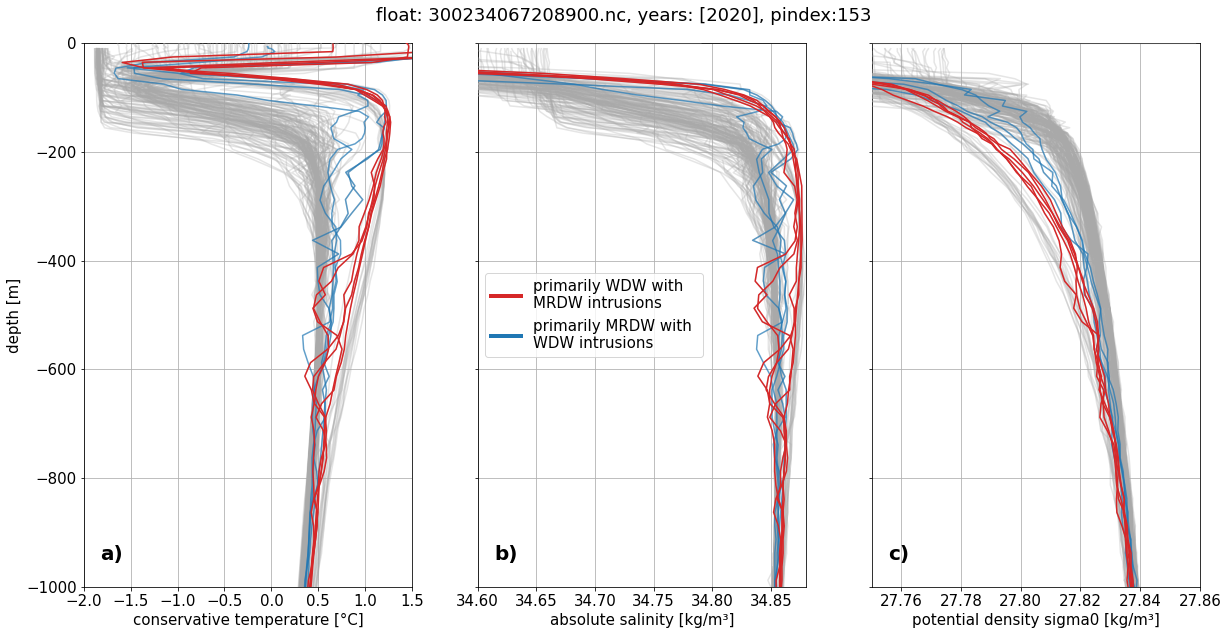

In [12]:
# This one can plot the profiles with an espacially high rms value in front of the background profiles
plt.rc('font', size=15)
variables = ['tem', 'sal', 'den']

df, profiles = utils.create_dataframe(pfloat='300234067208900.nc', force_reconstruction=False)
df_col = xarray.open_dataset('../data/collocation_300234067208900.nc'); title = '300234067208900.nc'

rms, indices, dates = utils.compute_diapycnal_spice_variations(
                                       profiles, 
                                       upperdepthlimit=250, 
                                       lowerdepthlimit=1600, )
indices = numpy.array(indices)
rms = numpy.array(rms)
indices = indices[rms>0.5e-5]#4e-6]
print('found %s rmslimit profiles'%(len(indices)))

variables_dictionary = dict(tem='conservative temperature [°C]',
                           sal='absolute salinity [kg/m³]',
                           den='potential density sigma0 [kg/m³]',
                           gamman='neutral density [kg/m³]')

years = [2020]#,2020]#,2017,2018,2019]#2018,2019,2020]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
profiles_with_coordinates = []
#for rmsindex in indices[:50]:
fig, axs = plt.subplots(nrows=1, ncols=3, gridspec_kw={'width_ratios':[5,5,5], 'hspace':0.2}, figsize=[20,10])#, sharey=True)
for index, variable in enumerate(variables):#['tem', 'sal', 'den', 'spice']):
        
    for rmsindex in [130,131,149,150]: # for WDW in MRDW
        axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
                        color='tab:blue', alpha=0.7, zorder=5, ls='-')
        depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo

    for rmsindex in [133, 147, 148, 152, 153]: # for MRDW in WDW
        axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
                        color='tab:red', alpha=1, zorder=5, ls='-')
        depth = df_col.sel(time=profiles[rmsindex].iloc[0].dates.to_pydatetime()).depth_topo
        
    norm = matplotlib.colors.Normalize(vmin=-4000.0, vmax=-3000.0)
    cmap = plt.cm.coolwarm_r
    #axs[index].plot(profiles[rmsindex][variable], profiles[rmsindex]['pre'], 
    #                color='k', alpha=1, zorder=5, ls=':'

    for cycle in range(2, max(df['cyk'])):
        profile = df[df['cyk']==cycle]

        #if cycle in [130,131]:
        #    axs[index].plot(profile[variable], profile['pre'], color='k', alpha=1, zorder=5)
        #    axs[index].plot(profile[variable], profile['pre'], color='k', alpha=1, zorder=5)
        if len(profile)==0:
            continue
        if (profile.iloc[0].dates.year in years) and (
            profile.iloc[0].dates.month in months):
            #if (profile.iloc[0].dates.year==2020) and (profile.iloc[0].dates.month>4):
            #    continue
            try:
                depth = df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo
                topo = abs(df_col.sel(time=profile.iloc[0].dates.to_pydatetime()).depth_topo_grady)
                profile['depth'] = depth.values
                profile['topo'] = topo.values
                profiles_with_coordinates.append(profile)
            except:
                continue
            rgba = cmap(norm(depth))
            axs[index].plot(profile[variable], profile['pre'], color='darkgrey', zorder=3, alpha=0.3)#rgba, alpha=0.5, zorder=3)
        else:
            axs[index].plot(profile[variable], profile['pre'], color='lightgrey', alpha=0.0, zorder=-2)
            pass
        #if cycle in indices:


    axs[index].set_xlabel(variables_dictionary[variable])
    axs[index].grid(zorder=0)
    axs[index].set_ylim(-1000,0)

fig.suptitle('float: %s, years: %s, pindex:%s'%(title, years,rmsindex), y=0.93)
axs[0].set_ylabel('depth [m]')
axs[0].set_xlim(-2,1.5)
axs[1].set_xlim(34.6,34.88)
axs[2].set_xlim(27.75,27.86)
#axs[2].set_xlim(28,28.3)
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
#cb1 = matplotlib.colorbar.ColorbarBase(axs[len(variables)], cmap=cmap,
#                                norm=norm,)
#cb1.set_label('bathymetry depth')

#fig.colorbar(cb1, ax=axs[3])
#plt.savefig('SortedProfiles_MRDW_in_WDW.png', dpi=200)
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:grey', lw=4)]

axs[1].legend(custom_lines, 
              ['primarily WDW with \nMRDW intrusions', 
               'primarily MRDW with \nWDW intrusions'],
              loc='center left')
# plt.legend()
for n, ax in enumerate(axs):   
    ax.text(0.05, 0.05, string.ascii_lowercase[n]+')', transform=ax.transAxes, 
            size=20, weight='bold')
plt.savefig('../plots/figures/figure6.png', dpi=300)
plt.show()

In [ ]:
#profiles_with_coordinates

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#df = import pandas
df = pandas.concat(profiles_with_coordinates)

norm = matplotlib.colors.Normalize(vmin=-4500.0, vmax=-2500.0)
cmap = plt.cm.coolwarm_r

# Fixing random state for reproducibility
#np.random.seed(19680801)

#n = 100000
#x = np.random.standard_normal(n)
#y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
#xmin = x.min()
#xmax = x.max()
#ymin = y.min()
#ymax = y.max()
x = df['sal'] 
y = df['pre'] 
c=df['depth']

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap=cmap, mincnt=10)
#ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, c, gridsize=50, cmap=cmap, mincnt=20)
#ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axs[1].set_xlim(34.6,34.88)
ax.set_title("With a log color scale")

#cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap,
#                                norm=norm,)
#cb1.set_label()
cb = fig.colorbar(hb, ax=ax)
cb.set_label('bathymetry depth')

plt.show()

In [ ]:
voltages = [10.4,15,15,10.3,15,15,10.3,15,15,9.8,15,15,10.2,15,15,10.2,15,15,10.2,10.2,15,15,9.9,15,15,10.3,15,15,10.2,10.2,10.2,9.9,15,15,10.3,15,15,10.3,15,15,10.3,10.2,10,15,15,10.3,15,15,10.2,15,15,10.2,10.3,10,15,15,10.2,10.2,10.3,10.2,9.8,15,15,10.2,10.2,10.2,10.2,9.9,15,15,10.2,10.3,10.2,15,15,10.3,15,15,10,15,15,10.2,10.2,10.2,10.3,9.9,9.9,9.8,9.8,15,15,9.9,15,15,9.9,9.9,15,15,9.9,9.9,9.9,15,9.9,10,15,9.8,9.9,10,15,9.9,9.4,9.9,9.8,9.7,9.8,9.7,9.7,9.8,9.7,9.7,9.8,9.8,9.8,9.7,9.8,9.8,9.8,9.7,9.8,9.7,9.7,9.7,9.7,9.7,9.7,9.7,9.8,9.7,9.6,9.6,9.7,9.6,9.6,9.6,9.5,9.6,9.6,9.6,9.5,9.5,9.6,9.5,9.6,9.5,9.5,9.5,9.5,9.4,9.5,9.5,9.5,9.5,9.5,9.5,9.4,9.5,9.4,9.4,9.4,9.3,9.3,9.4,9.3,9.4,9.3,9.3,9.4,9.4,9.3,15,15,9.5,9.5,9.3,9.5,9.5,9.3,9.5,9.5,9.3,9.6,15,9.4,9.3,9.3,9.4,9.3,9.3,9.2,9.3,9.5,15,9.3,15,9.3,9.3,15,9.3,15,9.3,15,9.3,9.3,15,9.3,9.4,15,9.4,15,9.3,15,9.3,15,9.2,15,9.4,9.4,9.3,15,9.3,9.7,9.2,15,9.8,9.8,9.3,15,15,9.8,9.7,9.3,15,15,9.8,9.7,9.3,15,15,9.8,9.9,9.3,15,15,9.9,9.8,9.4,15,15,9.8,9.8,9.3,15,15,9.8,9.8,9.4,15,15,9.9,9.8,9.3,15,15,9.9,9.9,9.5,15,15,9.9,15,9.9,15,15,9.5,15,15,9.9,9.8,9.3,15,15,9.8,9.9,9.4,15,15,9.8,9.9,9.5,15,15,9.9,15,15,9.9,9.4,15,15,9.9,9.8,9.3,15,15,9.8,9.8,9.4,15,15,9.9,9.9,15,15,9.4,15,15,9.9,9.9,15,15,9.4,15,15,9.1,15,9.8,9.8,9.3,9.8,9.8,9.2,9.8,9.8,9.2,9.8,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.1,9.2,9.2,9.2,9.1,9.1,9.2,9.1,9.3,9.2,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.1,9.2,9.2,9.1,9.1,9.1,9.2,9.2,9.2,9.2,9.1,9.2,9.1,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.3,9.3,15,9.2,15,9.3,15,9.4,15,9.2,15,9.8,15,9.2,9.3,9.3,15,9.2,15,9.2,15,9.4,15,9.2,15,9.3,15,-2.23517e-07,10.4,10.4,10.4,10.3,10.4,10.3,10.3,10.6,10.8,10.3,10.3,10.4,10.4,10.3,10.3,9.9,10.4,15,15,10.3,15,15,10.3,15,15,9.8,15,15,10.2,15,15,10.2,15,15,10.2,10.2,15,15,9.9,15,15,10.3,15,15,10.2,10.2,10.2,9.9,15,15,10.3,15,15,10.3,15,15,10.3,10.2,10,15,15,10.3,15,15,10.2,15,15,10.2,10.3,10,15,15,10.2,10.2,10.3,10.2,9.8,15,15,10.2,10.2,10.2,10.2,9.9,15,15,10.2,10.3,10.2,15,15,10.3,15,15,10,15,15,10.2,10.2,10.2,10.3,9.9,9.9,9.8,9.8,15,15,9.9,15,15,9.9,9.9,15,15,9.9,9.9,9.9,15,9.9,10,15,9.8,9.9,10,15,9.9,9.4,9.9,9.8,9.7,9.8,9.7,9.7,9.8,9.7,9.7,9.8,9.8,9.8,9.7,9.8,9.8,9.8,9.7,9.8,9.7,9.7,9.7,9.7,9.7,9.7,9.7,9.8,9.7,9.6,9.6,9.7,9.6,9.6,9.6,9.5,9.6,9.6,9.6,9.5,9.5,9.6,9.5,9.6,9.5,9.5,9.5,9.5,9.4,9.5,9.5,9.5,9.5,9.5,9.5,9.4,9.5,9.4,9.4,9.4,9.3,9.3,9.4,9.3,9.4,9.3,9.3,9.4,9.4,9.3,15,15,9.5,9.5,9.3,9.5,9.5,9.3,9.5,9.5,9.3,9.6,15,9.4,9.3,9.3,9.4,9.3,9.3,9.2,9.3,9.5,15,9.3,15,9.3,9.3,15,9.3,15,9.3,15,9.3,9.3,15,9.3,9.4,15,9.4,15,9.3,15,9.3,15,9.2,15,9.4,9.4,9.3,15,9.3,9.7,9.2,15,9.8,9.8,9.3,15,15,9.8,9.7,9.3,15,15,9.8,9.7,9.3,15,15,9.8,9.9,9.3,15,15,9.9,9.8,9.4,15,15,9.8,9.8,9.3,15,15,9.8,9.8,9.4,15,15,9.9,9.8,9.3,15,15,9.9,9.9,9.5,15,15,9.9,15,9.9,15,15,9.5,15,15,9.9,9.8,9.3,15,15,9.8,9.9,9.4,15,15,9.8,9.9,9.5,15,15,9.9,15,15,9.9,9.4,15,15,9.9,9.8,9.3,15,15,9.8,9.8,9.4,15,15,9.9,9.9,15,15,9.4,15,15,9.9,9.9,15,15,9.4,15,15,9.1,15,9.8,9.8,9.3,9.8,9.8,9.2,9.8,9.8,9.2,9.8,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.1,9.2,9.2,9.2,9.1,9.1,9.2,9.1,9.3,9.2,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.2,9.1,9.2,9.2,9.1,9.1,9.1,9.2,9.2,9.2,9.2,9.1,9.2,9.1,9.1,9.2,9.2,9.2,9.2,9.2,9.2,9.3,9.3,15,9.2,15,9.3,15,9.4,15,9.2,15,9.8,15,9.2,9.3,9.3,15,9.2,15,9.2,15,9.4,15,9.2,15,9.3,15,9.1,15,9.2,15,9.2,9.2,15,9.2,15,9.3,15,9.1,15,9.1,15,9,9.1,15,9.1,15,9.2,15,9,15,9.2,15,9.1,15,9.1,9.1,15,9,15,9.2,15,9.2,-2.23517e-07,10.4,10.4,10.4,10.3,10.4,10.3,10.3,10.6,10.8,10.3,10.3,10.4,10.4,10.3,10.3,9.9]
plt.plot(voltages)
plt.ylim(8,11)

In [ ]:
profiles[10]

In [59]:
A = numpy.array([0,1,1.2,1.3,0.2,0,0.2])
A[A==0] = numpy.nan

nan
nan


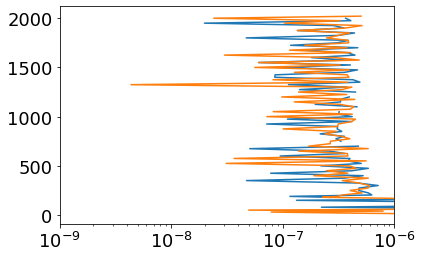

In [72]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

fig, ax = plt.subplots()
#index = 10
for index in range(108,110):
    profile = profiles[index]
    profile = profile.drop_duplicates(subset = ["sal"])
    N2, pmid = gsw.Nsquared(profile['sal'], profile['tem'], -profile['pre'])
    N2[N2<=0] = numpy.nan
    print(numpy.min(N2))
    ax.plot(N2, pmid)
    ax.set_xscale('log')
    ax.set_xlim(1e-9,1e-6)

In [15]:
df, profiles = utils.create_dataframe(pfloat='old', force_reconstruction=False)
profiles[10]

Returning previously computed DataFrame...


,index,sal,tem,den,pre,tim,cyk,rho,dates,timestamps,nsq
691,630,34.209486,-0.233966,27.351719,-1.0,292.0,11,1027.356498,2018-12-28 04:00:00,1.545966e+09,4.317804e-05
1614,82760,34.215463,-0.237023,27.356668,-2.1,292.0,11,1027.366703,2018-12-28 04:00:00,1.545966e+09,1.514475e-05
2326,53558,34.217425,-0.237062,27.358247,-3.1,292.0,11,1027.373059,2018-12-28 04:00:00,1.545966e+09,8.625771e-05
3012,26082,34.227430,-0.238128,27.366336,-4.0,292.0,11,1027.385449,2018-12-28 04:00:00,1.545966e+09,1.783260e-04
3536,626,34.250494,-0.239248,27.384919,-5.0,292.0,11,1027.408809,2018-12-28 04:00:00,1.545966e+09,1.487301e-04
...,...,...,...,...,...,...,...,...,...,...,...
109876,82667,34.842730,0.045188,27.845883,-1838.0,286.0,11,1036.423227,2018-12-27 22:00:00,1.545944e+09,4.830413e-07
110953,25990,34.842734,0.033642,27.846509,-1863.0,286.0,11,1036.538697,2018-12-27 22:00:00,1.545944e+09,1.414920e-07
111677,534,34.841733,0.023095,27.846274,-1887.8,286.0,11,1036.652303,2018-12-27 22:00:00,1.545944e+09,4.518392e-07
112455,25988,34.841737,0.012540,27.846844,-1912.5,286.0,11,1036.766193,2018-12-27 22:00:00,1.545944e+09,4.788052e-07


In [20]:
numpy.arange(27.76,27.86,0.02)

array([27.76, 27.78, 27.8 , 27.82, 27.84])